In [1]:
from ime_pylib import scan_tools as sc

import matplotlib.pyplot as plt
import numpy as np
import sympy
import scipy as sp
from scipy.optimize import curve_fit

In [2]:
sc.set_path("./IME_datfiles")

In [50]:
#res=sc.scan_load(615)
res=sc.scan_load(619,623)

#looks only at measurements taken with this command:
#res=sc.scan_load(615,616,top_function="measure_c_bridge_lin)

File: ./IME_datfiles/MKA_000619.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000620.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000621.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000622.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000623.mat loaded . top_function: measure_c_bridge_lin (name identified from number)


In [51]:
res[0]._fieldnames

['logmsg',
 'comment',
 'FileNr',
 'FileName',
 'top_function',
 'time_before',
 'T_before',
 'C_bridge',
 'fr_bridge',
 'time_after',
 'T_after']

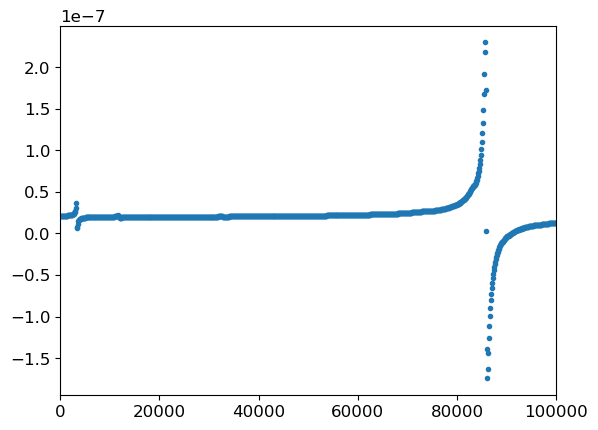

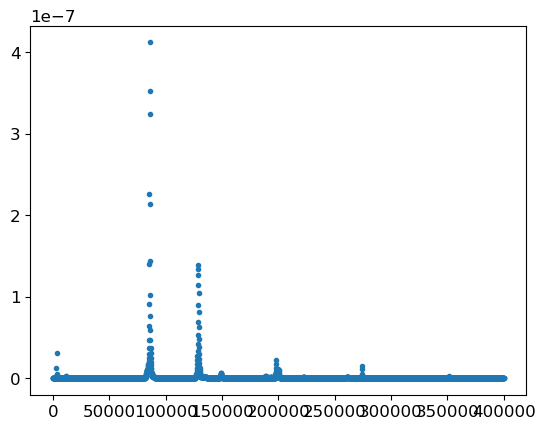

In [52]:
plt.plot(res[0].fr_bridge,res[0].C_bridge,'.')
plt.xlim(0,100000)
plt.show()
plt.plot(res[0].fr_bridge,-res[0].C_bridge.imag,'.')

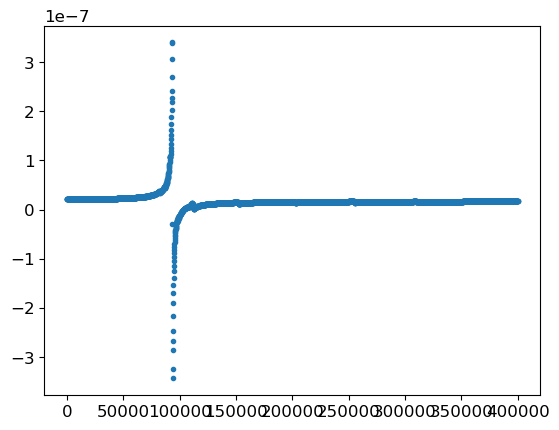

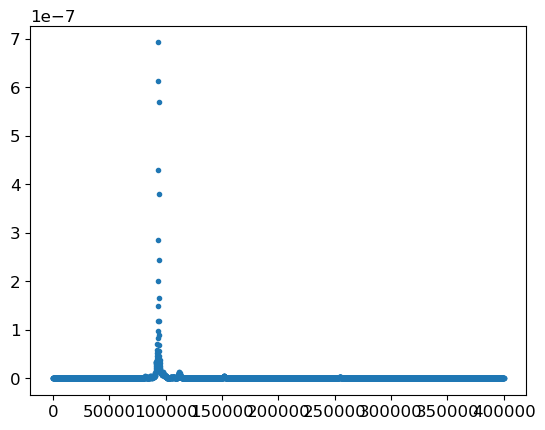

In [53]:
plt.plot(res[4].fr_bridge,res[1].C_bridge,'.')
plt.show()
plt.plot(res[4].fr_bridge,-res[1].C_bridge.imag,'.')

In [54]:
def model(f, C1, C2, L, R):
    w = 2*np.pi*f
    return C1 + 1 / (1/C2 - w**2*L + 1j*w*R)

def fit_func(fdata, *args):
    l = model(fdata, *args)
    return np.abs(l)

def fit(fdata, Cdata, p0):
    Cdata_real = np.abs(Cdata)
    popt, _ = curve_fit(fit_func, fdata, Cdata_real, p0)
    return popt

def makefits(data, p0):
    C_fit = np.zeros_like(data)
    popt_data = np.zeros_like(data)
    
    for i in range(0, len(data)):
        # find values for parameters
        popt_data[i] = fit(data[i].fr_bridge, data[i].C_bridge, p0)
        
        # the model sometimes comes up with negative values for a parameter
        # Since we know they are all positive, this always corrects that
        popt_data = np.abs(popt_data)
        
        # find the ydata for the fit to plot it later
        C_fit[i] = model(data[i].fr_bridge, *popt_data[i])
        
        #this is to double check if the values make sense
        #print(popt_data[i])
    return C_fit, popt_data

In [55]:
p0 = 2.1e-8, 1.7e-9, 9.3e-6, 1000
Jfit, popt = makefits(res, p0)

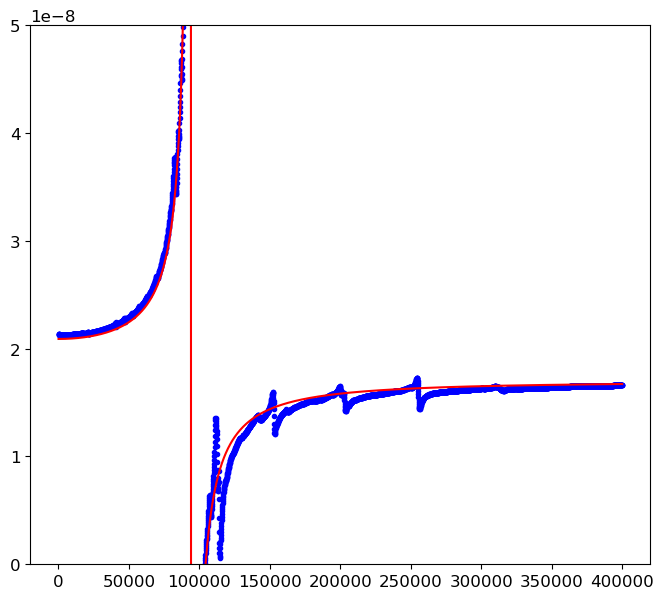

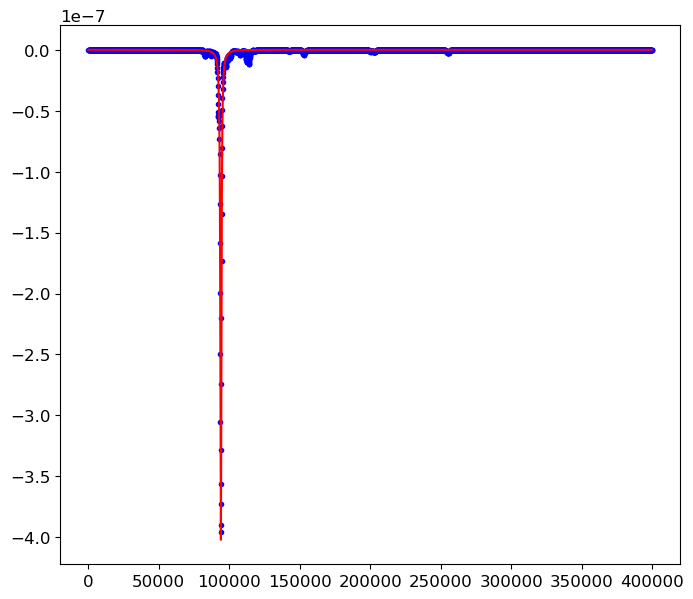

In [56]:
'''#initial values
plt.plot(res[0].fr_bridge, np.real(res[0].C_bridge),'.b')
y = model(res[0].fr_bridge, 1.e-8, 1.e-8, 25.e-5, 10)
plt.plot(res[0].fr_bridge, y, '-r')
plt.show()
'''
# real data+fit
plt.rc('font', size=12)
plt.figure(figsize=(8,7))

plt.plot(res[4].fr_bridge, np.real(res[4].C_bridge),'.b')
plt.plot(res[4].fr_bridge, np.real(Jfit[4]), '-r')
plt.ylim(0,5e-8)
#plt.xlim(8e4,1e5)
plt.show()

# imag data+fit
plt.rc('font', size=12)
plt.figure(figsize=(8,7))

plt.plot(res[4].fr_bridge, np.imag(res[4].C_bridge),'.b')
plt.plot(res[4].fr_bridge, np.imag(Jfit[4]), '-r')


In [10]:
popt[4]

array([4.62303629e-04, 1.21483795e-06, 1.49482123e-11, 1.36960363e-05,
       4.21461237e+04])

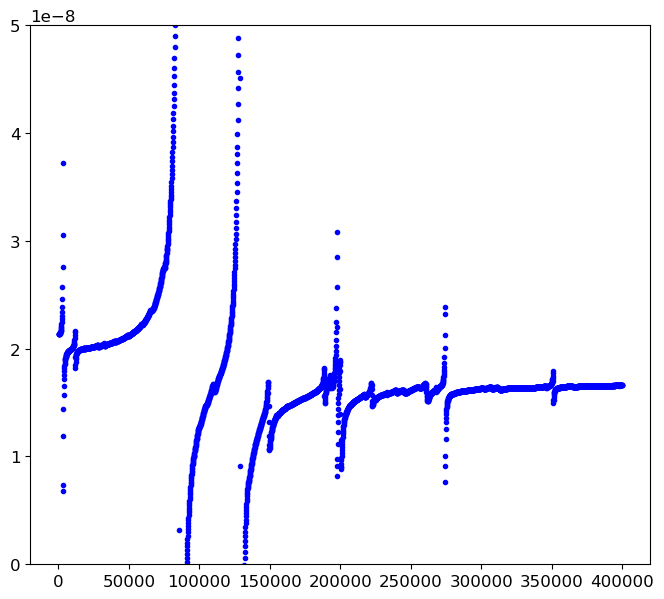

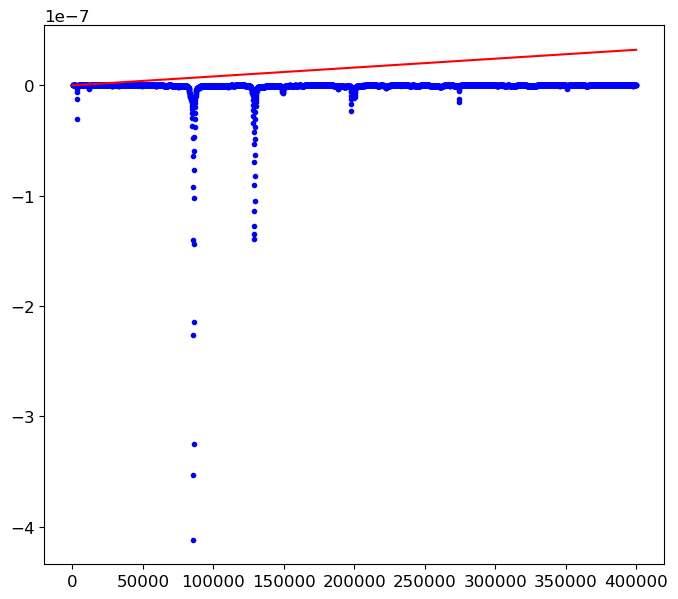

In [11]:
# real data+fit
plt.rc('font', size=12)
plt.figure(figsize=(8,7))

plt.plot(res[0].fr_bridge, np.real(res[0].C_bridge),'.b')
plt.plot(res[0].fr_bridge, np.real(Jfit[0]), '-r')
plt.ylim(0,5e-8)
#plt.xlim(8e4,1e5)
plt.show()

# imag data+fit
plt.rc('font', size=12)
plt.figure(figsize=(8,7))

plt.plot(res[0].fr_bridge, np.imag(res[0].C_bridge),'.b')
plt.plot(res[0].fr_bridge, np.imag(Jfit[0]), '-r')


(1e-08, 3e-08)

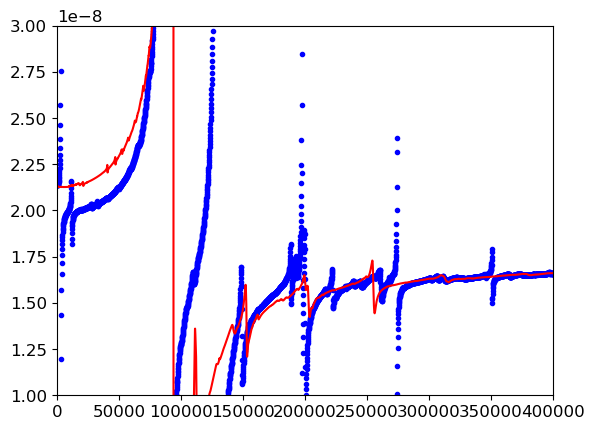

In [12]:
plt.plot(res[0].fr_bridge,res[0].C_bridge,'.b')
plt.plot(res[4].fr_bridge,res[4].C_bridge,'-r')
plt.xlim(0,400000)
plt.ylim(10.e-9,30e-9)

In [13]:
res=sc.scan_load(619,629)
#19 [0]: squalane
#20 no
#21 no
#22 no
#23 [4]: empty
#24 no
#25 no
#26 no
#27 no
#28 no
#29 [10]: water

File: ./IME_datfiles/MKA_000619.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000620.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000621.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000622.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000623.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000624.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000625.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000626.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000627.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IM

(1.5e-08, 2.5e-08)

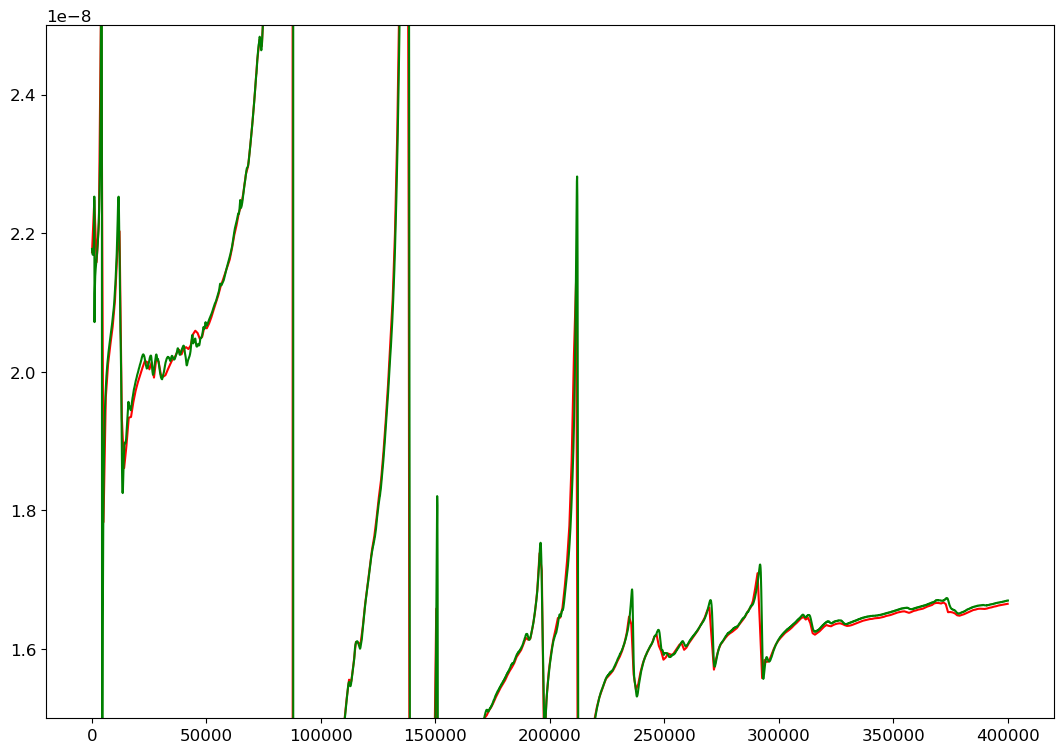

In [14]:
plt.figure(figsize=(13,9))
#plt.plot(res[5].fr_bridge,res[5].C_bridge,'-b') # 1st fill  (400 datapoints)
#plt.plot(res[7].fr_bridge,res[7].C_bridge,'-r') # 2nd fill  (400 datapoints)
#plt.plot(res[8].fr_bridge,res[8].C_bridge,'-g')  # 3rd fill  (400 datapoints)
#plt.plot(res[1].fr_bridge,res[1].C_bridge,'-r') # empty     (4000 datapoints)
#plt.plot(res[0].fr_bridge,res[0].C_bridge,'-r') # squalane  (4000 datapoints)
plt.plot(res[9].fr_bridge,res[9].C_bridge,'-r')  # 4th fill  (400 datapoints)
plt.plot(res[10].fr_bridge,res[10].C_bridge,'-g')  # 4th fill  (4000 datapoints)

#plt.xlim(0,90e3)
plt.ylim(15e-9,25e-9)
#plt.xlim(90e3,300e3)
#plt.ylim(5e-9,3e-8)

## function for fitting stiffness stuff

$$S(\omega) = \frac{K}{V} g\left( \frac{\omega}{\omega_r} \right) \quad \mathrm{where} \quad g(x) = -\frac{1}{3} \frac{x^2 \sin x}{x \cos x - \sin x} \left( +2/3 \right)\ ,\ \omega_r = \sqrt{ \frac{K}{\rho} } \frac{1}{r_0}$$

$$S(\omega) = - \frac{K}{4*\pi*r^3} \left( \frac{\left( \frac{\omega}{\omega_r} \right)^2 \sin \left( \frac{\omega}{\omega_r} \right)}{\left( \frac{\omega}{\omega_r} \right) \cos \left( \frac{\omega}{\omega_r} \right) - \sin \left( \frac{\omega}{\omega_r } \right)} +2/3 \right)\ ,\ \omega_r = \sqrt{ \frac{K}{\rho} } \frac{1}{r_0} $$
